In [3]:
%load_ext lab_black
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import scipy.io as sp
# from scipy.stats import expon, poisson, norm
# import statistics
# import pandas as pd
# from math import exp, sqrt
# import copy
# import random

In [2]:
plt.style.use("ggplot")
fig_width = 8  # width in inches
fig_height = 6  # height in inches
fig_size = [fig_width, fig_height]
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.autolayout"] = True

sns.set(style="whitegrid", context="notebook", palette="Set2", font_scale=1.5)

# Problem 3: Hopfield Model
In this exercise, we seek to construct a Hopfield network with N = 64 neurons, whose dynamics
are given by the differential equation

$x = −x + f(Wx) + \sigma \eta(t) (1)$

where x is the vector of firing rates, W is the N × N weight matrix, and σ = 0.1 is an external
noise level. For mathematical simplicity, we will set the activation function to f(x) = sign(x), so
that neural activity can run from −1 to 1. (This step is simply for mathematical convenience, i.e.,
it makes the math simpler. If necessary, however, one can also simulate the Hopfield network with
a more realistic input-output functions such as the one we used above.) To store a pattern p in the
Hopfield network, we set the weight matrix to $W_{ij} = p_ip_j$ , i.e., the weight matrix is the outer product
of two vectors,

$ W = \frac{1}{N} pp^T$

where by convention, p is assumed to be a column vector, and the superscript T denotes the matrix
transpose; here, it makes a column vector into a row vector

(8, 8)

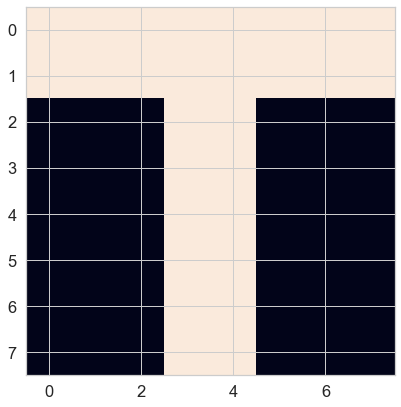

In [3]:
P = np.array(
    [
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [-1, -1, -1, 1, 1, -1, -1, -1],
        [-1, -1, -1, 1, 1, -1, -1, -1],
        [-1, -1, -1, 1, 1, -1, -1, -1],
        [-1, -1, -1, 1, 1, -1, -1, -1],
        [-1, -1, -1, 1, 1, -1, -1, -1],
        [-1, -1, -1, 1, 1, -1, -1, -1],
    ]
)

plt.imshow(P)
N = 64
W = (1 / N) * P * P.transpose()
P.shape